In [285]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from google.colab import drive
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
#drive.mount('/content/drive')

In [286]:
# df_train = pd.read_csv("/content/drive/My Drive/files/train.csv")
df_train = pd.read_csv(r"C:\D_drive\IITG\Other activities\Data Science Hackathon - Techniche (2021)\beyond-analysis\train.csv")
df_train.head()

,UNIQUE_IDENTIFIER,SEQUENCE_NO,STATUS_CHECK,CATEGORY_1,CATEGORY_2,ACTIVE_YN,ENTRY,REVENUE,WINNINGS_1,WINNINGS_2,...,WITHDRAW_NUMBER,DEPOSIT_TRAILS,ENTRY_NUMBER,WINNINGS_NUMBER,PRACTICE_ENTRY,PRACTICE_WINNINGS,PRACTICE_ENTRY_NUMBER,PRACTICE_WINNINGS_NUMBER,Y1,Y2
0,98481267304,1,0,M,B,1,0.00000,0.000000,0.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.449287,101.369863
1,98481267304,2,0,M,B,1,0.13735,0.011550,0.0999,0.0,...,0.0,0.0,1.8,1.0,0.0,0.0,0.0,0.0,4.449287,101.369863
2,98481267304,3,0,M,B,1,0.15835,0.010425,0.0242,0.0,...,0.0,0.0,0.7,0.3,0.0,0.0,0.0,0.0,4.449287,101.369863
3,98481267304,4,0,M,B,1,0.44490,0.035850,0.2398,0.0,...,0.0,0.0,2.8,1.5,0.0,0.0,0.0,0.0,4.449287,101.369863
4,98481267304,5,0,M,B,1,0.00000,0.000000,0.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.449287,101.369863


In [287]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 25 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UNIQUE_IDENTIFIER         1048575 non-null  int64  
 1   SEQUENCE_NO               1048575 non-null  int64  
 2   STATUS_CHECK              1048575 non-null  int64  
 3   CATEGORY_1                1048575 non-null  object 
 4   CATEGORY_2                1048575 non-null  object 
 5   ACTIVE_YN                 1048575 non-null  int64  
 6   ENTRY                     1048575 non-null  float64
 7   REVENUE                   1048575 non-null  float64
 8   WINNINGS_1                1048575 non-null  float64
 9   WINNINGS_2                1048575 non-null  float64
 10  DISCOUNT                  1048575 non-null  float64
 11  DEPOSIT                   1048575 non-null  float64
 12  DEPOSIT_NUMBER            1048575 non-null  float64
 13  DEPOSIT_2                 1

In [288]:
#df_test = pd.read_csv("/content/drive/My Drive/files/test.csv")
df_test = pd.read_csv(r"C:\D_drive\IITG\Other activities\Data Science Hackathon - Techniche (2021)\beyond-analysis\test.csv")
df_test.head(5)

,UNIQUE_IDENTIFIER,SEQUENCE_NO,STATUS_CHECK,CATEGORY_1,CATEGORY_2,ACTIVE_YN,ENTRY,REVENUE,WINNINGS_1,WINNINGS_2,...,DEPOSIT_2,WITHDRAW,WITHDRAW_NUMBER,DEPOSIT_TRAILS,ENTRY_NUMBER,WINNINGS_NUMBER,PRACTICE_ENTRY,PRACTICE_WINNINGS,PRACTICE_ENTRY_NUMBER,PRACTICE_WINNINGS_NUMBER
0,98481269471,1,0,M,D,1,5.975,0.90500,0.4100,0.0,...,1.0,0.0,0.0,9.8,1.4,0.2,0.0,0.0,0.0,0.0
1,98481269471,2,0,M,D,0,0.000,0.00000,0.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,98481270499,1,1,M,D,1,0.050,0.00750,0.0850,0.0,...,1.0,0.0,0.0,0.0,0.1,0.1,0.0,0.0,0.0,0.0
3,98481270499,2,1,M,D,1,1.750,0.26250,1.0200,0.0,...,0.0,0.0,0.0,0.0,3.5,1.2,0.0,0.0,0.0,0.0
4,98481272694,1,0,M,C,1,0.125,0.01875,0.0425,0.0,...,10.0,0.0,0.0,0.0,0.5,0.1,0.0,0.0,0.0,0.0


In [289]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979059 entries, 0 to 979058
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   UNIQUE_IDENTIFIER         979059 non-null  int64  
 1   SEQUENCE_NO               979059 non-null  int64  
 2   STATUS_CHECK              979059 non-null  int64  
 3   CATEGORY_1                979059 non-null  object 
 4   CATEGORY_2                979059 non-null  object 
 5   ACTIVE_YN                 979059 non-null  int64  
 6   ENTRY                     979059 non-null  float64
 7   REVENUE                   979059 non-null  float64
 8   WINNINGS_1                979059 non-null  float64
 9   WINNINGS_2                979059 non-null  float64
 10  DISCOUNT                  979059 non-null  float64
 11  DEPOSIT                   979059 non-null  float64
 12  DEPOSIT_NUMBER            979059 non-null  float64
 13  DEPOSIT_2                 979059 non-null  f

In [290]:
a = pd.Index(df_train["UNIQUE_IDENTIFIER"])
b = pd.Index(df_test["UNIQUE_IDENTIFIER"])
a.intersection(b)

Int64Index([], dtype='int64', name='UNIQUE_IDENTIFIER')

In [291]:
cat1_cols_train_list = sorted(df_train["CATEGORY_1"].unique())
cat2_cols_train_list = sorted(df_train["CATEGORY_2"].unique())
cat1_cols_test_list = sorted(df_test["CATEGORY_1"].unique())
cat2_cols_test_list = sorted(df_test["CATEGORY_2"].unique())

cat1_cols_list = sorted(list(set(cat1_cols_train_list)|set(cat1_cols_test_list)))
print(cat1_cols_list)
cat2_cols_list = sorted(list(set(cat2_cols_train_list)|set(cat2_cols_test_list)))
print(cat2_cols_list)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'I', 'J', 'K', 'L', 'M']
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']


In [292]:
df_train_grouped = df_train.groupby('UNIQUE_IDENTIFIER')
function_dict = {"SEQUENCE_NO": "max", "STATUS_CHECK": pd.Series.mode, 
                 "CATEGORY_1":pd.Series.mode, "CATEGORY_2":pd.Series.mode, "ACTIVE_YN":"mean", "ENTRY":"mean",
                 "REVENUE":"mean", "WINNINGS_1":"mean", "WINNINGS_2":"mean", "DISCOUNT":"mean", "DEPOSIT":"mean",
                 "DEPOSIT_NUMBER":"mean", "DEPOSIT_2":"mean", "WITHDRAW":"mean", "WITHDRAW_NUMBER":"mean", 
                 "DEPOSIT_TRAILS":"mean","ENTRY_NUMBER":"mean", "WINNINGS_NUMBER":"mean","PRACTICE_ENTRY":"mean",
                 "PRACTICE_WINNINGS":"mean", "PRACTICE_ENTRY_NUMBER":"mean", "PRACTICE_WINNINGS_NUMBER":"mean",
                 "Y1":pd.Series.mode,"Y2":pd.Series.mode}
df_train_grouped = df_train_grouped.aggregate(function_dict)
df_train_grouped["ACTIVE_YN"] = round(df_train_grouped["ACTIVE_YN"]).astype(int)
df_train_grouped

,SEQUENCE_NO,STATUS_CHECK,CATEGORY_1,CATEGORY_2,ACTIVE_YN,ENTRY,REVENUE,WINNINGS_1,WINNINGS_2,DISCOUNT,...,WITHDRAW_NUMBER,DEPOSIT_TRAILS,ENTRY_NUMBER,WINNINGS_NUMBER,PRACTICE_ENTRY,PRACTICE_WINNINGS,PRACTICE_ENTRY_NUMBER,PRACTICE_WINNINGS_NUMBER,Y1,Y2
UNIQUE_IDENTIFIER,,,,,,,,,,,,,,,,,,,,,
98481267304,7,0,M,B,1,0.112236,0.008682,0.052929,0.000000,0.000000,...,0.000000,0.000000,0.928571,0.442857,0.00000,0.00000,0.00,0.00,4.449287,101.369863
98481267698,19,1,M,I,1,30.285742,3.733455,25.120618,0.000000,1.163158,...,0.010526,0.684211,0.700000,0.247368,0.00000,0.00000,0.00,0.00,7.182779,115.068493
98481269325,18,0,M,D,1,0.083720,0.007540,0.052828,0.000000,0.033333,...,0.000000,0.027778,1.311111,0.305556,0.00000,0.00000,0.00,0.00,3.977371,24.657534
98481271512,5,0,M,E,1,0.777000,0.122220,0.017000,0.000000,0.240000,...,0.000000,0.540000,0.900000,0.040000,0.00000,0.00000,0.00,0.00,3.988122,10.958904
98481273023,1,0,M,I,1,0.500000,0.080000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.200000,0.000000,0.00000,0.00000,0.00,0.00,4.128875,46.575342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98526361740,5,1,B,I,1,0.050000,0.008000,0.000000,0.000000,0.000000,...,0.000000,0.440000,0.040000,0.000000,0.00000,0.00000,0.00,0.00,3.985657,2.739726
98526361771,5,0,C,D,1,0.396365,0.045882,0.069830,0.000000,0.080000,...,0.000000,0.040000,1.440000,0.300000,0.11724,0.04048,0.16,0.04,3.972451,13.698630
98526361856,19,1,C,I,1,63.880916,7.929593,52.246139,0.000000,0.331579,...,0.000000,0.394737,1.952632,0.810526,0.00000,0.00000,0.00,0.00,60.746532,449.315068


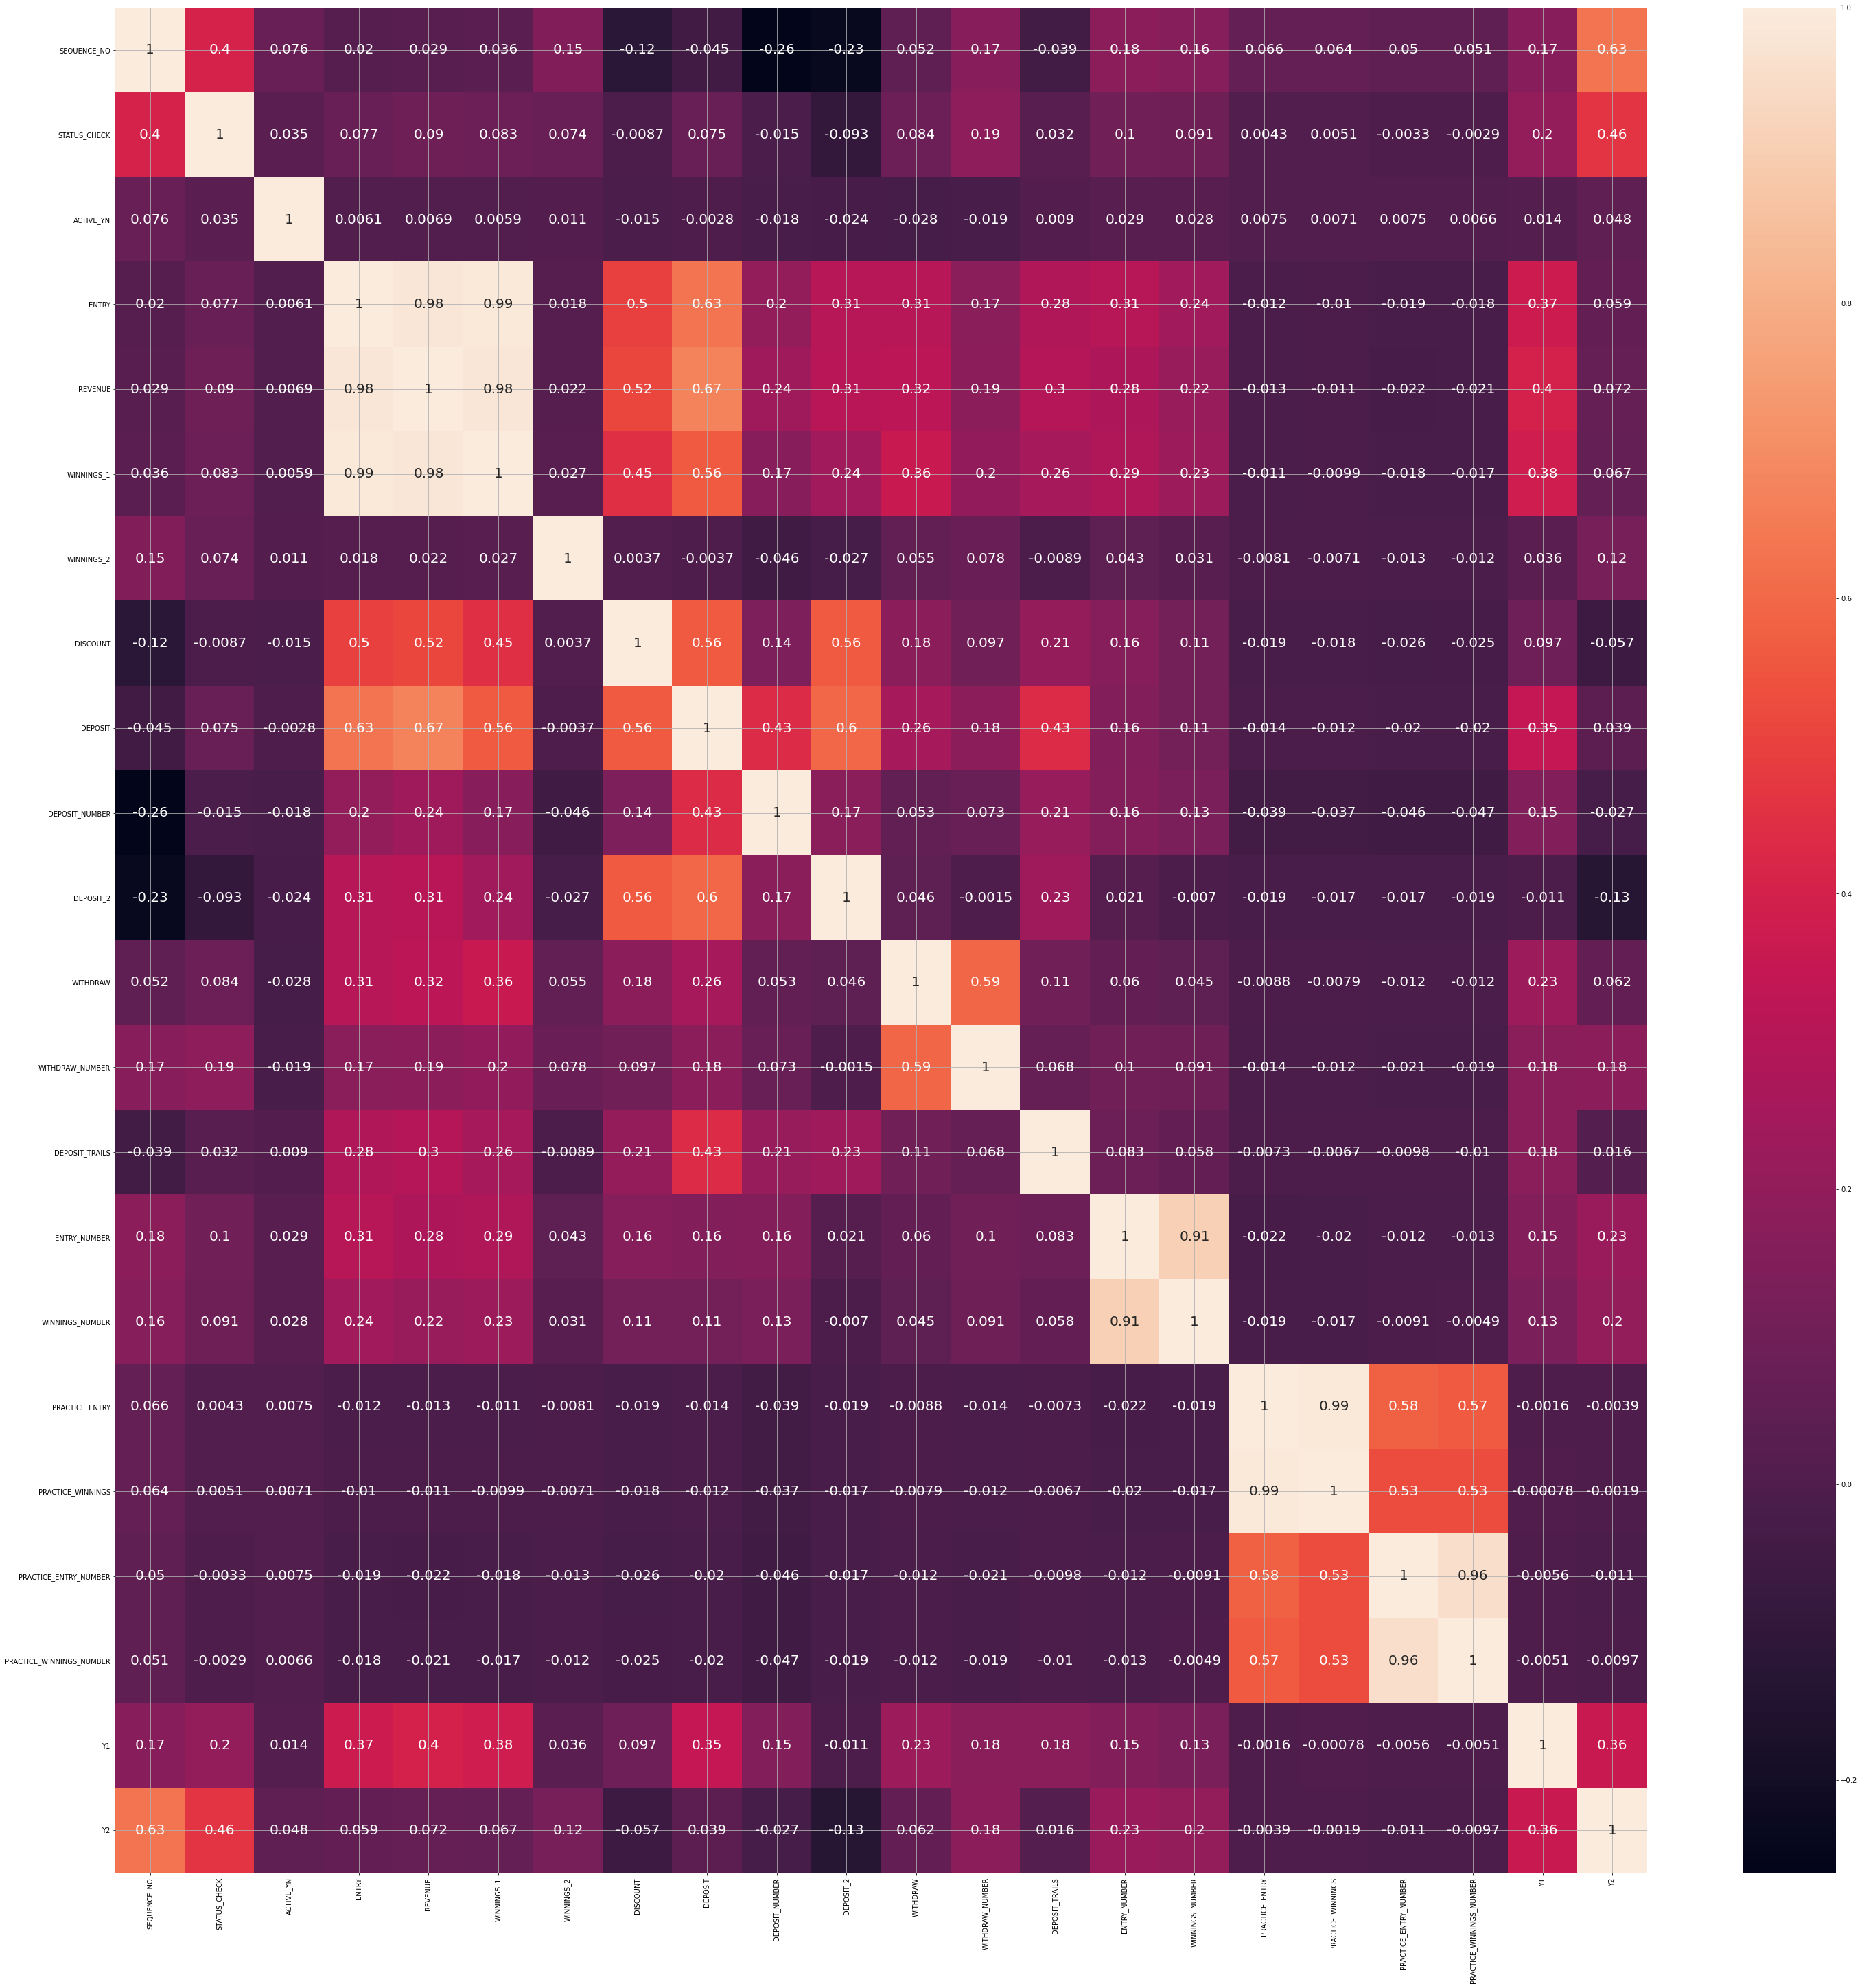

In [293]:
fig, ax = plt.subplots(figsize=(50,50))
corr_mat = df_train_grouped.corr()
sns.heatmap(corr_mat, annot = True, annot_kws={"fontsize":20})
ax.grid()

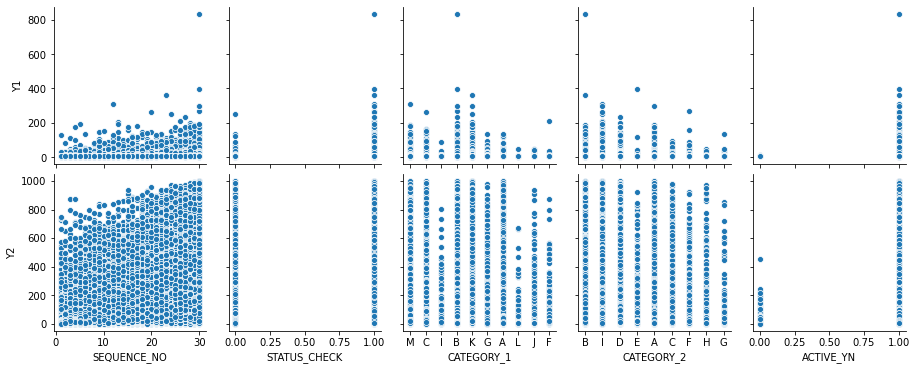

In [294]:
sns.pairplot(df_train_grouped,x_vars=list(df_train_grouped.columns)[:5],y_vars=list(df_train_grouped.columns)[-2:])

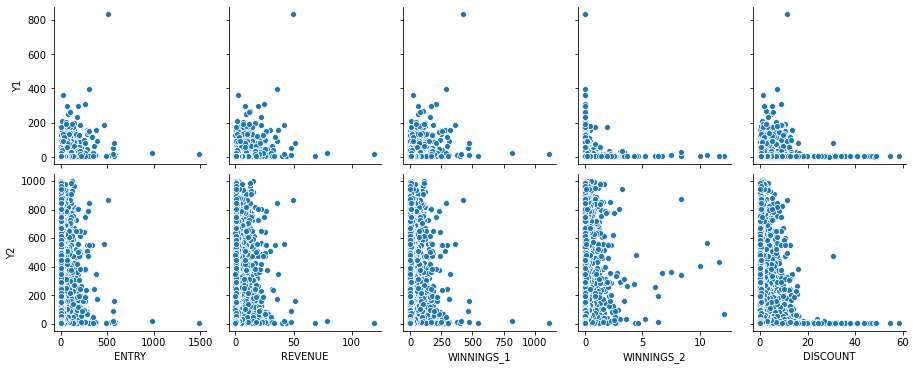

In [295]:
sns.pairplot(df_train_grouped,x_vars=list(df_train_grouped.columns)[5:10],y_vars=list(df_train_grouped.columns)[-2:])

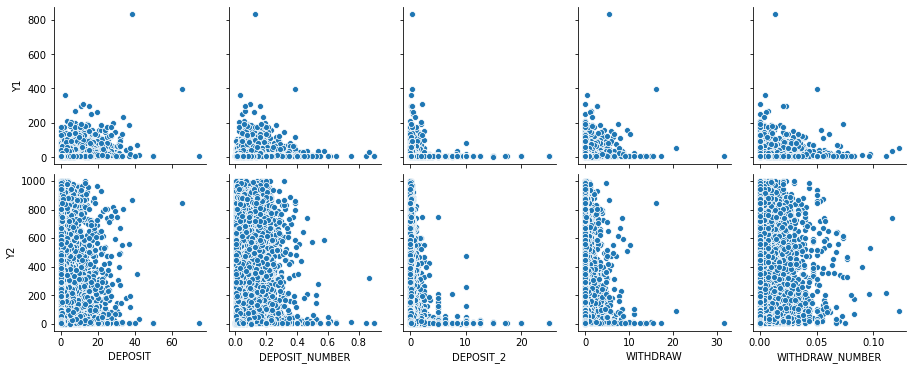

In [296]:
sns.pairplot(df_train_grouped,x_vars=list(df_train_grouped.columns)[10:15],y_vars=list(df_train_grouped.columns)[-2:])

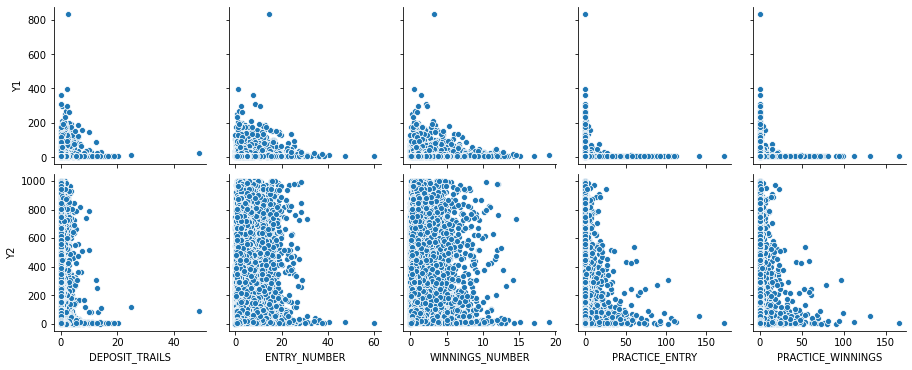

In [297]:
sns.pairplot(df_train_grouped,x_vars=list(df_train_grouped.columns)[15:20],y_vars=list(df_train_grouped.columns)[-2:])

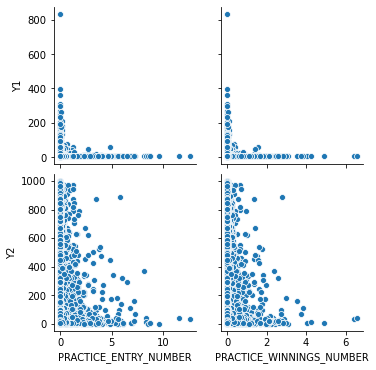

In [298]:
sns.pairplot(df_train_grouped,x_vars=list(df_train_grouped.columns)[20:-2],y_vars=list(df_train_grouped.columns)[-2:])

In [299]:
df_train_grouped

,SEQUENCE_NO,STATUS_CHECK,CATEGORY_1,CATEGORY_2,ACTIVE_YN,ENTRY,REVENUE,WINNINGS_1,WINNINGS_2,DISCOUNT,...,WITHDRAW_NUMBER,DEPOSIT_TRAILS,ENTRY_NUMBER,WINNINGS_NUMBER,PRACTICE_ENTRY,PRACTICE_WINNINGS,PRACTICE_ENTRY_NUMBER,PRACTICE_WINNINGS_NUMBER,Y1,Y2
UNIQUE_IDENTIFIER,,,,,,,,,,,,,,,,,,,,,
98481267304,7,0,M,B,1,0.112236,0.008682,0.052929,0.000000,0.000000,...,0.000000,0.000000,0.928571,0.442857,0.00000,0.00000,0.00,0.00,4.449287,101.369863
98481267698,19,1,M,I,1,30.285742,3.733455,25.120618,0.000000,1.163158,...,0.010526,0.684211,0.700000,0.247368,0.00000,0.00000,0.00,0.00,7.182779,115.068493
98481269325,18,0,M,D,1,0.083720,0.007540,0.052828,0.000000,0.033333,...,0.000000,0.027778,1.311111,0.305556,0.00000,0.00000,0.00,0.00,3.977371,24.657534
98481271512,5,0,M,E,1,0.777000,0.122220,0.017000,0.000000,0.240000,...,0.000000,0.540000,0.900000,0.040000,0.00000,0.00000,0.00,0.00,3.988122,10.958904
98481273023,1,0,M,I,1,0.500000,0.080000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.200000,0.000000,0.00000,0.00000,0.00,0.00,4.128875,46.575342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98526361740,5,1,B,I,1,0.050000,0.008000,0.000000,0.000000,0.000000,...,0.000000,0.440000,0.040000,0.000000,0.00000,0.00000,0.00,0.00,3.985657,2.739726
98526361771,5,0,C,D,1,0.396365,0.045882,0.069830,0.000000,0.080000,...,0.000000,0.040000,1.440000,0.300000,0.11724,0.04048,0.16,0.04,3.972451,13.698630
98526361856,19,1,C,I,1,63.880916,7.929593,52.246139,0.000000,0.331579,...,0.000000,0.394737,1.952632,0.810526,0.00000,0.00000,0.00,0.00,60.746532,449.315068


In [300]:
cols_encode = ["CATEGORY_1", "CATEGORY_2"]
df_train_enc_cols = pd.get_dummies(df_train_grouped[cols_encode])
cols_dummies = sorted(list(df_train_enc_cols.columns))
df_train_enc_cols = df_train_enc_cols.reindex(columns=cols_dummies)

In [301]:
X = df_train_grouped.iloc[:,:-2]
X = pd.concat([X,df_train_enc_cols],axis=1)
X.drop(columns=['CATEGORY_1','CATEGORY_2'],inplace=True)
y = df_train_grouped.iloc[:,-1:-3]
X

,SEQUENCE_NO,STATUS_CHECK,ACTIVE_YN,ENTRY,REVENUE,WINNINGS_1,WINNINGS_2,DISCOUNT,DEPOSIT,DEPOSIT_NUMBER,...,CATEGORY_1_M,CATEGORY_2_A,CATEGORY_2_B,CATEGORY_2_C,CATEGORY_2_D,CATEGORY_2_E,CATEGORY_2_F,CATEGORY_2_G,CATEGORY_2_H,CATEGORY_2_I
UNIQUE_IDENTIFIER,,,,,,,,,,,,,,,,,,,,,
98481267304,7,0,1,0.112236,0.008682,0.052929,0.000000,0.000000,0.035714,0.014286,...,1,0,1,0,0,0,0,0,0,0
98481267698,19,1,1,30.285742,3.733455,25.120618,0.000000,1.163158,10.263158,0.052632,...,1,0,0,0,0,0,0,0,0,1
98481269325,18,0,1,0.083720,0.007540,0.052828,0.000000,0.033333,0.013889,0.005556,...,1,0,0,0,1,0,0,0,0,0
98481271512,5,0,1,0.777000,0.122220,0.017000,0.000000,0.240000,0.700000,0.040000,...,1,0,0,0,0,1,0,0,0,0
98481273023,1,0,1,0.500000,0.080000,0.000000,0.000000,0.000000,0.500000,0.100000,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98526361740,5,1,1,0.050000,0.008000,0.000000,0.000000,0.000000,0.050000,0.020000,...,0,0,0,0,0,0,0,0,0,1
98526361771,5,0,1,0.396365,0.045882,0.069830,0.000000,0.080000,0.300000,0.040000,...,0,0,0,0,1,0,0,0,0,0
98526361856,19,1,1,63.880916,7.929593,52.246139,0.000000,0.331579,11.552632,0.136842,...,0,0,0,0,0,0,0,0,0,1


In [302]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,SEQUENCE_NO,STATUS_CHECK,ACTIVE_YN,ENTRY,REVENUE,WINNINGS_1,WINNINGS_2,DISCOUNT,DEPOSIT,DEPOSIT_NUMBER,...,CATEGORY_1_M,CATEGORY_2_A,CATEGORY_2_B,CATEGORY_2_C,CATEGORY_2_D,CATEGORY_2_E,CATEGORY_2_F,CATEGORY_2_G,CATEGORY_2_H,CATEGORY_2_I
UNIQUE_IDENTIFIER,,,,,,,,,,,,,,,,,,,,,
98518565319,2,0,1,0.135275,0.008371,0.014300,0.000000,0.000000,0.125000,0.050000,...,0,0,0,0,0,0,0,0,0,1
98519662668,6,1,1,89.605637,10.690518,86.985067,0.000000,1.000000,0.041667,0.016667,...,0,0,1,0,0,0,0,0,0,0
98525061796,28,1,1,1.335464,0.212657,1.420982,0.000000,0.171429,0.071964,0.014286,...,0,0,0,0,0,0,0,0,0,1
98483687007,6,0,1,3.025000,0.450625,2.728750,0.000000,0.333333,0.333333,0.033333,...,1,0,0,0,1,0,0,0,0,0
98525463063,21,1,1,0.443538,0.062210,0.412774,0.039286,0.066667,0.011905,0.004762,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98517786397,2,0,1,0.187500,0.030000,0.000000,0.000000,0.000000,0.250000,0.050000,...,0,0,0,0,0,0,0,0,0,1
98523062784,30,1,1,2.974725,0.468625,2.447763,0.000000,0.392667,0.429333,0.070000,...,0,0,0,0,0,0,0,0,0,1
98525589362,1,0,1,1.000000,0.150000,0.000000,0.000000,3.000000,0.250000,0.100000,...,0,0,0,0,1,0,0,0,0,0


In [303]:
X_train_num_1 = X_train.iloc[:,0:1]
X_train_num_2 = X_train.iloc[:,3:-19]
X_train_num = pd.concat([X_train_num_1,X_train_num_2],axis=1)
cat_columns = [i for i in list(X_train.columns) + list(X_train_num.columns) if i not in list(X_train.columns) or i not in list(X_train_num.columns)]
X_train_cat = X_train[cat_columns]
print(X_train_num_std.shape)
print(X_train_cat.shape)

(65348, 18)
(65348, 21)


In [304]:
X_val_num_1 = X_val.iloc[:,0:1]
X_val_num_2 = X_val.iloc[:,3:-19]
X_val_num = pd.concat([X_val_num_1,X_val_num_2],axis=1)
X_val_cat = X_val[cat_columns]
print(X_val_num.shape)
print(X_val_cat.shape)

(16338, 18)
(16338, 21)


In [305]:
'''scaler = MinMaxScaler().fit(X_train_num)
X_train_num_std = scaler.transform(X_train_num)
X_val_num_std = scaler.transform(X_val_num)'''

'scaler = MinMaxScaler().fit(X_train_num)\nX_train_num_std = scaler.transform(X_train_num)\nX_val_num_std = scaler.transform(X_val_num)'

In [306]:
'''X_train_num_std = pd.DataFrame(data = X_train_num_std, columns = list(X_train_num.columns))
X_val_num_std = pd.DataFrame(data = X_val_num, columns = list(X_val_num.columns))'''

'X_train_num_std = pd.DataFrame(data = X_train_num_std, columns = list(X_train_num.columns))\nX_val_num_std = pd.DataFrame(data = X_val_num, columns = list(X_val_num.columns))'

In [307]:
'''X_train_std = pd.concat([X_train_num_std,X_train_cat],axis=1)
X_val_std = pd.concat([X_val_num_std,X_val_cat],axis=1)'''

'X_train_std = pd.concat([X_train_num_std,X_train_cat],axis=1)\nX_val_std = pd.concat([X_val_num_std,X_val_cat],axis=1)'

In [308]:
np.isnan(X_train_std)

,SEQUENCE_NO,ENTRY,REVENUE,WINNINGS_1,WINNINGS_2,DISCOUNT,DEPOSIT,DEPOSIT_NUMBER,DEPOSIT_2,WITHDRAW,...,CATEGORY_1_M,CATEGORY_2_A,CATEGORY_2_B,CATEGORY_2_C,CATEGORY_2_D,CATEGORY_2_E,CATEGORY_2_F,CATEGORY_2_G,CATEGORY_2_H,CATEGORY_2_I
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98526361502,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
98526361740,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
98526361856,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
98526362089,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False


In [216]:
mlp = MLPRegressor(hidden_layer_sizes=(10,10), learning_rate_init=0.01, max_iter=200).fit(X_train, y_train)
y_pred_train = mlp.predict(X_train)
y_pred_val = mlp.predict(X_val)
rmse_train_filt = np.sqrt(mean_squared_error(y_train,y_pred_train))
print(rmse_train_filt)
rmse_val_filt = np.sqrt(mean_squared_error(y_val,y_pred_val))
print(rmse_val_filt)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [44]:
xgb1.feature_importances_

array([0.16468802, 0.14327757, 0.        , 0.04247744, 0.19632608,
       0.08032311, 0.00935022, 0.02976613, 0.06091619, 0.02017564,
       0.01391175, 0.01461853, 0.01032688, 0.02984431, 0.0191404 ,
       0.01473604, 0.        , 0.02285674, 0.01459888, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.03495264,
       0.        , 0.00489762, 0.        , 0.03055492, 0.        ,
       0.04226094, 0.        , 0.        , 0.        ], dtype=float32)

In [45]:
xgb2 = XGBRegressor(n_estimators=50, max_depth=3).fit(X_train, y2_train)
y2_pred_train = xgb2.predict(X_train)
y2_pred_val = xgb2.predict(X_val)
rmse_train_filt = np.sqrt(mean_squared_error(y2_train,y2_pred_train))
print(rmse_train_filt)
rmse_val_filt = np.sqrt(mean_squared_error(y2_val,y2_pred_val))
print(rmse_val_filt)

122.40174390340785
126.44067416549531


In [46]:
xgb2.feature_importances_

array([0.5054446 , 0.17341495, 0.00102275, 0.00332667, 0.06522843,
       0.02303613, 0.00732104, 0.00483872, 0.01532647, 0.02402866,
       0.00766366, 0.01037096, 0.00396677, 0.00989756, 0.04641493,
       0.02811298, 0.00921995, 0.00436255, 0.00463168, 0.00726642,
       0.        , 0.00497208, 0.00270732, 0.        , 0.        ,
       0.        , 0.        , 0.0018278 , 0.        , 0.        ,
       0.00723184, 0.        , 0.        , 0.01928317, 0.        ,
       0.00386867, 0.        , 0.        , 0.00521329], dtype=float32)

In [47]:
df_test_grouped = df_test.groupby('UNIQUE_IDENTIFIER')
function_dict = {"SEQUENCE_NO": "max", "STATUS_CHECK": pd.Series.mode, 
                 "CATEGORY_1":pd.Series.mode, "CATEGORY_2":pd.Series.mode, "ACTIVE_YN":"mean", "ENTRY":"mean",
                "REVENUE":"mean", "WINNINGS_1":"mean", "WINNINGS_2":"mean", "DISCOUNT":"mean", "DEPOSIT":"mean",
                 "DEPOSIT_NUMBER":"mean", "DEPOSIT_2":"mean", "WITHDRAW":"mean", "WITHDRAW_NUMBER":"mean", 
                 "DEPOSIT_TRAILS":"mean","ENTRY_NUMBER":"mean", "WINNINGS_NUMBER":"mean","PRACTICE_ENTRY":"mean",
                 "PRACTICE_WINNINGS":"mean","PRACTICE_ENTRY_NUMBER":"mean", "PRACTICE_WINNINGS_NUMBER":"mean"}
df_test_grouped = df_test_grouped.aggregate(function_dict)
df_test_grouped["ACTIVE_YN"] = round(df_test_grouped["ACTIVE_YN"]).astype(int)
df_test_grouped

,SEQUENCE_NO,STATUS_CHECK,CATEGORY_1,CATEGORY_2,ACTIVE_YN,ENTRY,REVENUE,WINNINGS_1,WINNINGS_2,DISCOUNT,...,DEPOSIT_2,WITHDRAW,WITHDRAW_NUMBER,DEPOSIT_TRAILS,ENTRY_NUMBER,WINNINGS_NUMBER,PRACTICE_ENTRY,PRACTICE_WINNINGS,PRACTICE_ENTRY_NUMBER,PRACTICE_WINNINGS_NUMBER
UNIQUE_IDENTIFIER,,,,,,,,,,,,,,,,,,,,,
98481269471,2,0,M,D,0,2.987500,0.452500,0.205000,0.000000,1.200000,...,0.500000,0.000000,0.000000,4.900000,0.700000,0.100000,0.000000,0.000000,0.000000,0.000000
98481270499,2,1,M,D,1,0.900000,0.135000,0.552500,0.000000,0.000000,...,0.500000,0.000000,0.000000,0.000000,1.800000,0.650000,0.000000,0.000000,0.000000,0.000000
98481272694,19,0,M,C,1,0.006579,0.000987,0.002237,0.000000,0.210526,...,0.526316,0.000000,0.000000,0.000000,0.026316,0.005263,3.216236,2.155537,1.905263,0.557895
98481273365,27,0,M,D,1,0.565898,0.086024,0.329983,0.250556,0.111852,...,0.018519,0.000000,0.000000,0.033333,0.433333,0.129630,0.000000,0.000000,0.000000,0.000000
98481278321,5,0,M,F,1,0.660956,0.062309,0.112740,0.000000,0.360000,...,0.200000,0.000000,0.000000,0.000000,3.520000,1.220000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98537204815,30,1,B,D,1,1.265039,0.173392,0.994223,0.302000,0.505533,...,0.016667,0.013333,0.003333,0.006667,4.223333,0.916667,0.000000,0.000000,0.000000,0.000000
98537204877,1,0,K,C,1,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.250000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
98537204881,11,0,J,I,1,0.165000,0.025496,0.035455,0.012273,0.069091,...,0.022727,0.000000,0.000000,0.072727,0.390909,0.045455,0.000000,0.000000,0.000000,0.000000


In [48]:
cols_encode = ["CATEGORY_1", "CATEGORY_2"]
df_test_enc_cols = pd.get_dummies(df_test_grouped[cols_encode])
cols_dummies = sorted(list(df_test_enc_cols.columns))
df_test_enc_cols = df_test_enc_cols.reindex(columns=cols_dummies)
X_test = pd.concat([df_test_grouped,df_test_enc_cols],axis=1)
X_test.drop(columns=['CATEGORY_1','CATEGORY_2'],inplace=True)
X_test.drop(columns=['CATEGORY_1_D','CATEGORY_1_E'],inplace=True)
X_test

,SEQUENCE_NO,STATUS_CHECK,ACTIVE_YN,ENTRY,REVENUE,WINNINGS_1,WINNINGS_2,DISCOUNT,DEPOSIT,DEPOSIT_NUMBER,...,CATEGORY_1_M,CATEGORY_2_A,CATEGORY_2_B,CATEGORY_2_C,CATEGORY_2_D,CATEGORY_2_E,CATEGORY_2_F,CATEGORY_2_G,CATEGORY_2_H,CATEGORY_2_I
UNIQUE_IDENTIFIER,,,,,,,,,,,,,,,,,,,,,
98481269471,2,0,0,2.987500,0.452500,0.205000,0.000000,1.200000,2.750000,0.150000,...,1,0,0,0,1,0,0,0,0,0
98481270499,2,1,1,0.900000,0.135000,0.552500,0.000000,0.000000,0.500000,0.050000,...,1,0,0,0,1,0,0,0,0,0
98481272694,19,0,1,0.006579,0.000987,0.002237,0.000000,0.210526,0.526316,0.005263,...,1,0,0,1,0,0,0,0,0,0
98481273365,27,0,1,0.565898,0.086024,0.329983,0.250556,0.111852,0.222222,0.018519,...,1,0,0,0,1,0,0,0,0,0
98481278321,5,0,1,0.660956,0.062309,0.112740,0.000000,0.360000,0.500000,0.060000,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98537204815,30,1,1,1.265039,0.173392,0.994223,0.302000,0.505533,0.116667,0.023333,...,0,0,0,0,1,0,0,0,0,0
98537204877,1,0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.100000,...,0,0,0,1,0,0,0,0,0,0
98537204881,11,0,1,0.165000,0.025496,0.035455,0.012273,0.069091,0.113636,0.027273,...,0,0,0,0,0,0,0,0,0,1


In [60]:
y1_pred_test = xgb1.predict(X_test)
y1_pred_test[y1_pred_test<0] = 0
y1_pred_test

array([4.504079 , 4.5068045, 3.9926949, ..., 3.9323993, 4.803374 ,
       6.2520676], dtype=float32)

In [61]:
y2_pred_test = xgb2.predict(X_test)
y2_pred_test[y2_pred_test<0] = 0
y2_pred_test

array([  0.      ,  51.64989 ,  54.14691 , ...,  41.363308, 131.21342 ,
       470.4516  ], dtype=float32)

In [62]:
res = pd.DataFrame(columns=["UNIQUE_IDENTIFIER","Y1","Y2"])
res["UNIQUE_IDENTIFIER"] = df_test["UNIQUE_IDENTIFIER"].unique()
res["Y1"] = y1_pred_test
res["Y2"] = y2_pred_test
res

,UNIQUE_IDENTIFIER,Y1,Y2
0,98481269471,4.504079,0.000000
1,98481270499,4.506804,51.649891
2,98481272694,3.992695,54.146912
3,98481273365,4.449674,162.953049
4,98481278321,3.919585,22.324633
...,...,...,...
65237,98537204815,5.716319,432.499939
65238,98537204877,3.919585,3.540838
65239,98537204881,3.932399,41.363308
65240,98537205013,4.803374,131.213425


In [63]:
out_path = "Team_COR144_01_Sept_Manivas_3.csv"
#res.to_csv(out_path,index=False)